<a href="https://colab.research.google.com/github/mopinfish/joint-sustanability/blob/master/osmnx.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[OSMnx: Python for Street Networks](https://geoffboeing.com/2016/11/osmnx-python-street-networks/)

OSMnxは、OpenStreetMapから管理境界形状と道路ネットワークをダウンロードするためのPythonパッケージです。 

NetworkXを使用して、Pythonで複雑なストリートネットワークを簡単に構築、投影、視覚化、分析できます。

Pythonコードを1行追加するだけで、街や近所のウォーキング、ドライブ、または自転車のネットワークを取得できます。

次に、単純に袋小路や一方通行を視覚化し、最短経路のルートをプロットしたり、交差点密度、平均ノード接続性、媒介中心性などの統計を計算したりできます。

[こちら](https://geoffboeing.com/publications/osmnx-complex-street-networks/)から論文をダウンロード/引用できます。 

1行のコードで、OSMnxを使用して、たとえばモデナイタリアの街路ネットワークをダウンロード、構築、および視覚化できます。

（このブログ投稿は、OSMnxの新しいリリースごとに更新されるわけではありません。最新の情報については、[公式ドキュメント](https://osmnx.readthedocs.io/en/stable/)と[例](https://github.com/gboeing/osmnx-examples)を参照してください。）

## OSMnxのインストール 

OSMnxはGitHubにあり、condaまたはpipでインストールできます。
その際、rtreeとgeopandasを先に読み込んでおく必要があります。

In [0]:
!pip3 install pandas==0.25.0
!pip3 install requests==2.21.0
!pip3 install folium==0.2.1
!pip3 install geopandas==0.6.3
!pip3 install rtree
!pip3 install geopy
!pip3 install osmnx==0.10

  Using cached https://files.pythonhosted.org/packages/7d/e3/20f3d364d6c8e5d2353c72a67778eb189176f08e873c9900e10c0287b84b/requests-2.21.0-py2.py3-none-any.whl
ERROR: osmnx 0.11 has requirement requests>=2.22, but you'll have requests 2.21.0 which is incompatible.
  Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0


  Using cached https://files.pythonhosted.org/packages/69/77/98cbee7f94abe2c60013fd8751f2b2d6054d48078c61f9774cff0b341f43/osmnx-0.10-py2.py3-none-any.whl
  Found existing installation: osmnx 0.11
    Uninstalling osmnx-0.11:
      Successfully uninstalled osmnx-0.11


OSMnxをpipインストールする場合は、まずgeopandasとrtreeをインストールしてください。 

conda-forgeを使用してこれらの依存関係をインストールするのが最も簡単です。 

OSMnxに興味があるが、どこから始めればよいかわからない場合は、[このガイド](https://geoffboeing.com/2017/02/python-getting-started/)でPythonの使用を開始してください。

## OSMnxの使用方法
例のレポにはいくつかの例とチュートリアルがあります。この投稿では、OSMnxの5つの使用例を示します。

1. 管理場所の境界とシェープファイルを自動的にダウンロードする
2. 街路網をダウンロードして構築する
3. ネットワークトポロジの修正と簡素化
4. ストリートネットワークをシェープファイル、GraphML、またはSVGとしてディスクに保存する
5. 道路ネットワークの分析：ネットワーク統計のルーティング、視覚化、および計算

## 1.行政区域の境界とシェープファイルを取得する

行政区域GISデータを取得するには、通常、シェープファイルをオンラインで追跡してダウンロードする必要があります。

しかし、バルクまたは自動の取得と分析はどうでしょうか？ 

多数のWebページをクリックして、シェープファイルを1つずつダウンロードするよりも簡単な方法が必要です。 

OSMnxを使用すると、OpenStreetMapからプレースシェイプを（geopandas GeoDataFramesとして）Pythonコードの1行でダウンロードし、UTM（自動的に計算されるゾーン）に投影し、もう1行のコードで視覚化できます。

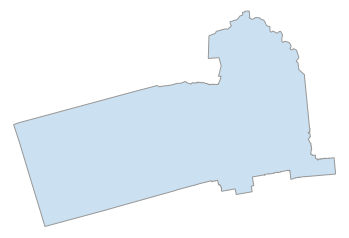

(<Figure size 432x432 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f75df7e6ef0>)

In [0]:
import osmnx as ox
city = ox.gdf_from_place('Berkeley, California')
ox.plot_shape(ox.project_gdf(city))

近隣、自治区、郡、州、国など、OpenStreetMapの任意の場所ジオメトリなど、他の場所タイプを簡単に取得できます。

In [0]:
place1 = ox.gdf_from_place('Manhattan, New York City, New York, USA')
place2 = ox.gdf_from_place('Cook County, Illinois')
place3 = ox.gdf_from_place('Iowa, USA')
place4 = ox.gdf_from_place('Bolivia')

または、複数の場所を単一のクエリに渡して、ジオメトリから単一のシェープファイルを作成できます。

都市、州、国、またはその他の地理的エンティティを使用してこれを行い、シェープファイルとしてハードドライブに保存できます。

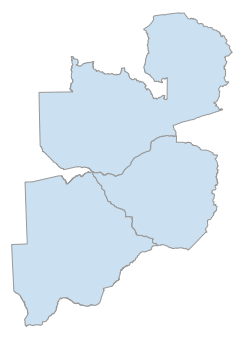

(<Figure size 432x432 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f2de14c48d0>)

In [0]:
places = ox.gdf_from_places(['Botswana', 'Zambia', 'Zimbabwe'])
places = ox.project_gdf(places)
ox.save_gdf_shapefile(places)
ox.plot_shape(ox.project_gdf(places))

## 2.道路網をダウンロードして構築する
ストリートネットワークGISデータを取得するには、通常、米国国勢調査局のTiger / Line道路、または他の国や都市の個々のデータセットを追跡する必要があります。
しかし、バルクの自動分析はどうでしょうか？
そして、Tiger / Lineが無視する非公式の経路と歩行者循環についてはどうでしょうか？
また、米国外の街路網についてはどうですか？ OSMnxはこれらすべての用途を処理します。

OSMnxを使用すると、ストリートネットワークデータをダウンロードして、トポロジが修正されたストリートネットワークを構築し、ネットワークを投影およびプロットし、後で使用するためにストリートネットワークをSVG、GraphMLファイル、またはシェープファイルとして保存できます。
道路網は方向付けられており、一方向の指向性を維持します。次のいずれかをOSMnxに提供することにより、ストリートネットワークをダウンロードできます（以下の例で説明します）。

* 境界ボックス
* 緯度経度のポイントと距離
* 住所と距離
* 目的の道路網の境界のポリゴン
* 地名または地名のリスト

複数の異なるネットワークタイプを指定することもできます。

* 「drive」-運転可能な公道を取得します（ただし、サービス道路は取得できません）
* 「drive_service」-公道を含む運転可能な公道を取得
* 「walk」-歩行者が使用できるすべての道路と小道を取得します（このネットワークタイプは一方向の方向性を無視します）
* 「bike」–サイクリストが使用できるすべての道路と小道を取得します
* 「all」-すべての（非プライベート）OSM通りとパスをダウンロードします
* 「all_private」-プライベートアクセスを含むすべてのOSMストリートおよびパスをダウンロードします

次のさまざまな手法を使用して、1行のコードでストリートネットワークをダウンロードして構築できます。

### 2a）バウンディングボックスからの道路網

これは、Pythonコードの1行で、緯度経度の境界ボックス内で駆動可能な道路ネットワークを取得し、それをUTMに投影してからプロットします。

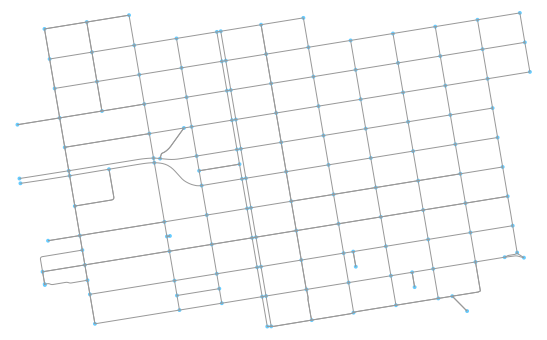

(<Figure size 687.674x432 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f2ddf282748>)

In [0]:
G = ox.graph_from_bbox(37.79, 37.78, -122.41, -122.43, network_type='drive')
G_projected = ox.project_graph(G)
ox.plot_graph(G_projected)

運転、徒歩、自転車などのネットワークを含むnetwork_type引数を渡すことで、さまざまな種類のストリートネットワークを取得できます。

### 2b）緯度経度地点からの道路網

これにより、緯度と経度の地点から0.75 km（ネットワークに沿って）以内の道路ネットワークが取得されます。

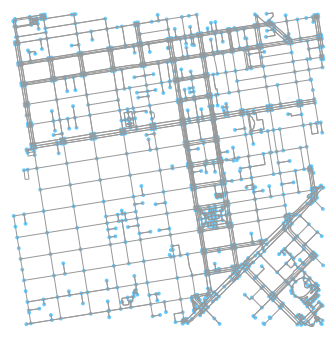

(<Figure size 540.194x432 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f2dd906f400>)

In [0]:
G = ox.graph_from_point((37.79, -122.41), distance=750, network_type='all')
ox.plot_graph(G)

また、ネットワークに沿ってではなく、ポイントの周りの基本方向の距離を指定することもできます。

### 2c）住所からの道路網

これにより、エンパイアステートビルディングから1 km（ネットワークに沿って）以内の道路ネットワークが取得されます。

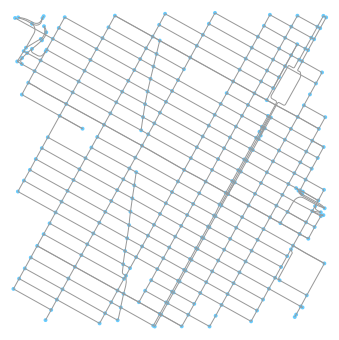

(<Figure size 568.567x432 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f2ddf35bbe0>)

In [0]:
G = ox.graph_from_address('350 5th Ave, New York, New York', network_type='drive')
ox.plot_graph(G)

また、ネットワークに沿ってではなく、住所を中心とした基本方向の距離を指定することもできます。

### 2d）ポリゴンからの道路網

geopandasでシェープファイルをロードし、そのシェイプジオメトリをOSMnxに渡すだけです。 
これにより、サンフランシスコのミッション地区のストリートネットワークが取得されます。

In [0]:
G = ox.graph_from_polygon(mission_shape, network_type='drive')
ox.plot_graph(G)

NameError: ignored

### 2e）地名からの道路網

ここがOSMnxの魅力です。 
OpenStreetMapに境界データがある任意の地名を渡すと、その境界内に道路網を自動的にダウンロードして構築します。 
ここでは、ロサンゼルス市内に運転ネットワークを作成します。

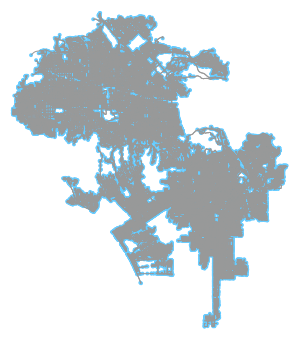

(<Figure size 455.783x432 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f2dda7506d8>)

In [0]:
G = ox.graph_from_place('Los Angeles, California', network_type='drive')
ox.plot_graph(G)

自治区、郡、州、またはその他の地理的エンティティ内の街路ネットワークを簡単にリクエストできます。 

場所（複数の近隣都市など）のリストを渡して、その中に統一された道路網を作成することもできます。 

この場所のリストには、文字列や構造化されたkey：value場所クエリを含めることができます。

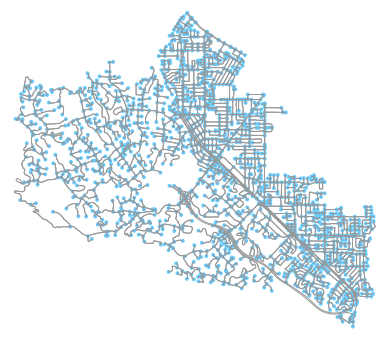

(<Figure size 625.437x432 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f2d879810f0>)

In [0]:
places = ['Los Altos, California, USA',
          {'city':'Los Altos Hills', 'state':'California'},
          'Loyola, California']
G = ox.graph_from_place(places, network_type='drive')
ox.plot_graph(G)

### 2f）世界中の街路網
一般に、米国の道路網データは、Tiger / Lineシェープファイルのおかげでかなり簡単に入手できます。 

OSMnxは、1行のコードで利用できるようにすることで簡単になり、OpenStreetMapからのすべての追加データで補完することで改善されます。 

ただし、世界のどこからでも街路網を取得することもできます。

そうしないと、そのようなデータが入手できない場合があります。

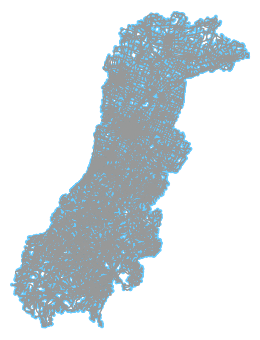

(<Figure size 457.221x432 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f2dbec0e3c8>)

In [0]:
G = ox.graph_from_place('Modena, Italy')
ox.plot_graph(G)

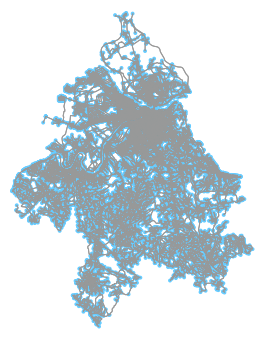

(<Figure size 465.98x432 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f2db62db3c8>)

In [0]:
G = ox.graph_from_place('Belgrade, Serbia')
ox.plot_graph(G)

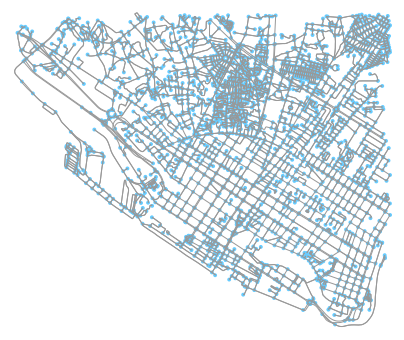

(<Figure size 575.107x432 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f2dad2e8748>)

In [0]:
G = ox.graph_from_address('Maputo, Mozambique', distance=3000)
ox.plot_graph(G)

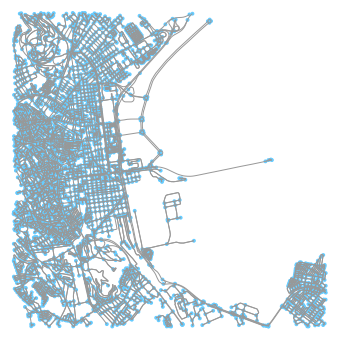

(<Figure size 537.347x432 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f2dc1746128>)

In [0]:
G = ox.graph_from_address('Bab Bhar, Tunis, Tunisia', distance=3000)
ox.plot_graph(G)

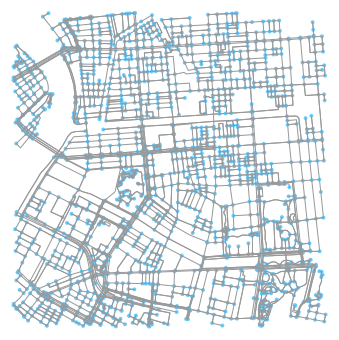

(<Figure size 529.368x432 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f2dcc798a58>)

In [0]:
G = ox.graph_from_address('Fukagawa, Koto, Tokyo, Japan', distance=1000) 
ox.plot_graph(G)

## 3.ネットワークトポロジを修正して簡素化する

単純化は、OSMnxによって自動的に行われますが、どのように機能するかを確認するために、それを分解することができます。 OpenStreetMapノードは奇妙な場合があります。交差点が含まれていますが、道路がカーブする単一の道路セグメントに沿ったすべてのポイントも含まれています。後者はグラフ理論の意味ではノードではないため、アルゴリズム的にそれらを削除し、「真の」ネットワークノード間のエッジのセットを単一のエッジに統合します。

OpenStreetMapからストリートネットワークを最初にダウンロードして構築すると、次のようになります。

複数の道路の交差点を表すノードのみを保持するように、このネットワークを単純化します。 OSMnxはこれを自動的に行います。まず、すべての非交差ノードを識別します。

そして、それらを削除しますが、真の交差点ノード間の道路セグメントの空間ジオメトリを忠実に維持します。

上記では、すべての非交差ノードが削除されており、すべての真の交差点（複数の道路の交差点）は青のままで、自己ループノードは紫色になっています。

単純化モードには、厳密モードと非厳密モードの2つがあります。

厳密モード（上記）では、OSMnxは、双方向の交差点が、曲線を曲がる1つの道路とトポロジ的に同一であると見なします。

入射エッジのOSM IDが異なるときにこれらの交差を保持する場合は、非厳密モードを使用します。

## 4.道路網をディスクに保存します

OSMnxは、ストリートネットワークをGraphMLファイルとしてディスクに保存して、後でGephiまたはnetworkxで使用できます。 

または、ネットワーク（ニューヨークの都市化地域のネットワークなど）をESRIシェープファイルとして保存して、GISで使用できます。

OSMnxは、Adobe Illustratorでの設計作業のために、ストリートネットワークをSVGファイルとして保存することもできます。

その後、GraphMLとして保存したネットワークをOSMnxにロードして、ネットワーク統計の計算、ルートの解決、または視覚化を行うことができます。

## 5.道路網の分析

これは街路網を使用する目的のほぼ全てであるため、今後の専用投稿で詳細な分析を行います。 

しかし、ここでいくつかの基本的な機能を簡単に要約します。 

OSMnxはNetworkX、geopandas、matplotlibの上に構築されているため、ネットワークを簡単に分析し、空間ネットワーク統計を計算できます。

In [0]:
G = ox.graph_from_place('Santa Monica, California', network_type='walk')
basic_stats = ox.basic_stats(G)
print(basic_stats['circuity_avg'])
extended_stats = ox.extended_stats(G, bc=True)
print(extended_stats['betweenness_centrality_avg'])

1.0461651312789078


NetworkXNotImplemented: ignored

統計は、基本機能と拡張機能の2つの機能に分かれています。 

拡張統計機能には、追加の高度な測定を実行するオプションのパラメーターもあります。 

また、一方通行の通りを考慮して、ポイント間の最短パスルートを計算してプロットすることもできます。

In [0]:
G = ox.graph_from_address('N. Sicily Pl., Chandler, Arizona', distance=800, network_type='drive')
route = nx.shortest_path(G, origin, destination)
ox.plot_graph_route(G, route)

NameError: ignored

OSMnxは、道路セグメントを長さで視覚化して、都市の最長ブロックと最短ブロックがどこに分布しているかを感覚的に提示することができます。

In [0]:
ec = ox.get_edge_colors_by_attr(G, attr='length')
ox.plot_graph(G, edge_color=ec)

NameError: ignored

OSMnxは、一方向のエッジと双方向のエッジを簡単に視覚化して、都市の一方通行の通りと分割された道路がどこに分布しているかを感覚的に提示できます。

In [0]:
ec = ['r' if data['oneway'] else 'b' for u, v, key, data in G.edges(keys=True, data=True)]
ox.plot_graph(G, node_size=0, edge_color=ec)

また、都市内のすべての袋小路（または他のタイプの交差点）をすばやく視覚化して、ネットワーク接続のこれらのポイントの感覚を得ることができます。

In [0]:
culdesacs = [key for key, value in G.graph['streets_per_node'].items() if value==1]
nc = ['r' if node in culdesacs else 'none' for node in G.nodes()]
ox.plot_graph(G, node_color=nc)

アランジェイコブスは有名な著書「Great Streets」で、それぞれの街路網の1平方マイルの図地図を通して、いくつかの都市の都市形態を比較しました。 

OSMnxを使用して、これを自動的に計算的に再作成できます。

これらのJacobsesque図地図は、OSMnxで完全に作成されます。

### 結論
OSMnxを使用すると、空間ジオメトリをダウンロードして、複雑な道路網を構築、投影、視覚化、分析できます。 強力で一貫性のある研究、交通工学、都市設計のために、道路ネットワークの収集と計算分析を自動化できます。 OSMnxはNetworkX、matplotlib、およびgeopandasの上に構築されており、豊富なネットワーク分析機能、美しくシンプルな視覚化、Rツリーを使用した高速空間クエリを提供します。

OSMnxはオープンソースで、GitHubにあります。 こちらから論文をダウンロード/引用できます。